![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [4]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<Axes: >

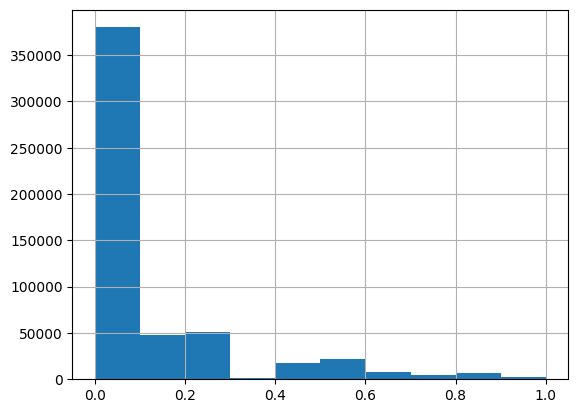

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 1

# Tokenización de los textos
vectorizer = CountVectorizer(max_features=5000)
X_train_trans = vectorizer.fit_transform(X_train)
X_test_trans = vectorizer.transform(X_test)

model = RandomForestRegressor(n_estimators=50, min_samples_leaf=4, n_jobs=-1)
model.fit(X_train_trans, y_train)

# Predicciones
y_pred = model.predict(X_test_trans)

# Resultados
mse_countvectorizer = metrics.mean_squared_error(y_test, y_pred)

print(f'Los resultados utilizando un RandomForest y countVectorizer es MSE:{mse_countvectorizer}')

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2

vectorizer = CountVectorizer(ngram_range=(3,3))
X_train_trans = vectorizer.fit_transform(X_train)
X_test_trans = vectorizer.transform(X_test)

model = RandomForestRegressor(n_estimators=50, min_samples_leaf=4, n_jobs=-1)
model.fit(X_train_trans, y_train)

# Predicciones
y_pred = model.predict(X_test_trans)

# Resultados
mse_countvectorizer_trigrams = metrics.mean_squared_error(y_test, y_pred)

print(f'Los resultados utilizando una RandomForest y countVectorize para trigramas es MSE:{mse_countvectorizer_trigrams}')

Los resultados utilizando una regresión logistica y countVectorizer es MSE:0.03980333230440809


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

Una forma de convertir texto en un formato numérico que es más útil para modelos de aprendizaje automático es la técnica de tokenización TfidfVectorizer de la biblioteca sklearn.feature_extraction.tex. La técnica TF-IDF, cuyo nombre es "Frecuencia de término-Frecuencia inversa de documentos", valora las palabras en los documentos tanto por su frecuencia como por la singularidad de cada palabra en el conjunto de documentos.

**Funcionamiento:**
-  **Term Frequency (TF)**: Es la cantidad de veces que un término aparece en un documento. Se puede calcular dividiendo el número total de veces que un término t aparece en un documento por el número total de términos que aparece en ese documento. Esto atribuye significado a los términos en función de su frecuencia.

-  **Inverse Document Frequency (IDF)**: Es un indicador de la importancia de un término. El IDF del término t aumenta con la cantidad de documentos que lo contienen. Esto ayuda a distinguir términos comunes de términos distintos en un conjunto de documentos. Se puede calcular dividiendo el número total de documentos por el número de documentos que contienen el término t.

-   **Cálculo de TF-IDF**: El producto de TF-IDF para un término en un documento es el valor final de TF-IDF. Este valor es alto para un término que aparece con frecuencia en un pequeño número de documentos; por lo tanto, podría ser más relevante para el análisis del contenido de un documento.


**Ventajas:**
- TfidfVectorizer tiene en cuenta tanto la frecuencia de las palabras como la importancia de cada palabra en el conjunto de documentos. Al destacar las palabras más relevantes y disminuir la importancia de las palabras comunes y menos informativas, esto puede ayudar a mejorar el rendimiento de los modelos de aprendizaje automático.
- Proporciona mejores caracteristicas para operaciones de procesamiento de textos, como clasificación y agrupación, porque las caracteristicas describen mejor la importancia relativa de los términos en los documentos.

**Desventajas:**
- Calcular un IDF puede resultar computacionalmente más costoso, especialmente para grandes conjuntos de datos, porque requiere documentos numéricos para cada vocabulario en la fase de comparación.
- A diferencia de CountVectorizer, que simplemente cuenta las palabras, los valores de TF-IDF pueden ser menos intuitivos y más difíciles de interpretar sin un análisis adicional.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
vectorizer = TfidfVectorizer()
X_train_trans = vectorizer.fit_transform(X_train)
X_test_trans = vectorizer.transform(X_test)

model = RandomForestRegressor(n_estimators=50, min_samples_leaf=4, n_jobs=-1)
model.fit(X_train_trans, y_train)

# Predicciones
y_pred = model.predict(X_test_trans)

# Resultados
mse_tfidfvectorizer = metrics.mean_squared_error(y_test, y_pred)

print(f'Los resultados utilizando una RandomForest y TfidfVectorizer es MSE:{mse_tfidfvectorizer}')

Los resultados utilizando una regresión logistica y countVectorizer es MSE:0.028007828603883254


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

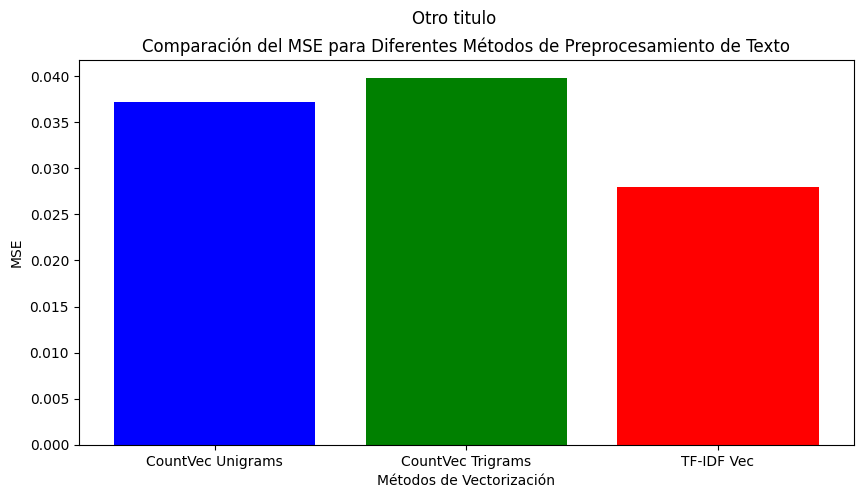

In [ ]:
import matplotlib.pyplot as plt

vector_methods = ['CountVec Unigrams', 'CountVec Trigrams', 'TF-IDF Vec']
valores_mse = [mse_countvectorizer, mse_countvectorizer_trigrams, mse_tfidfvectorizer] 
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10,5))
plt.bar(vector_methods, valores_mse, color=colors)
plt.xlabel('Métodos de Vectorización')
plt.ylabel('MSE')
plt.title('Comparación del MSE para Diferentes Métodos de Preprocesamiento de Texto')
plt.suptitle('Otro titulo')
plt.show()

1. **CountVectorizer (Valores por defecto)**: Este método parece tener el MSE más bajo de los n-grams, y más alto de encontrado con Tfidf lo que indica que el modelo no puede predecir la toxicidad con tanta precisión como con los otros métodos. Es posible que la vectorización basbada en unigramas no capture complentamente el contexto porque trata cada palabra individualmente. 

2. **CountVectorizer (Trigramas)**: Este método parece tener el MSE más alto, lo cual sugiere que incluir más contexto (al capturar secuencias de tres palabras) puede haber no ayudado al modelo a entender mejor el texto y mejorar las predicciones. Sin embargo, esto también puede llevar a una matriz de características mucho más grande y dispersa, que puede ser desafiante para el modelo procesar de manera efectiva.

3. **TfidfVectorizer**: El uso de TfidfVectorizer resulta en el MSE más bajo de los tres métodos, lo que sugiere que es el más efectivo para esta tarea. Esto puede deberse a que el TF-IDF da más importancia a las palabras que son distintivas y que pueden ser indicadores más fuertes de toxicidad, mientras minimiza el impacto de las palabras comunes que aparecen en muchos comentarios pero que no contribuyen a la toxicidad.

En resumen, la vectorización de texto es un paso crucial en el procesamiento del lenguaje natural porque convierte el texto, que es no estructurado y cualitativo, en una forma numérica estructurada que los modelos de aprendizaje automático pueden entender y usar. Cómo se realiza esta vectorización puede tener un impacto significativo en el rendimiento del modelo:

- **Contexto**: El contar con información contextual puede mejorar la capacidad del modelo para comprender el texto.
- **Dimensionalidad**: La creación de características a través de trigramas puede aumentar la dimensionalidad, lo que puede o no ser útil dependiendo de la cantidad de datos y la capacidad del modelo para manejar esa dimensionalidad.
- **Ponderación de Palabras**: La ponderación de palabras según su importancia (como en TF-IDF) parece ofrecer una mejora en la precisión de las predicciones en este caso.